<a href="https://colab.research.google.com/github/anupriyakhare34/IIMProject/blob/master/DSAT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading the Dataset and exploring the features**

In [0]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import re
import string
import matplotlib.pyplot as plt


dsat = pd.read_excel('Q2 DSAT Data.xlsx')

In [85]:
#### Check the column names
dsat.columns

Index(['TransactionNumber', 'MANAGER', 'Satisfied', 'FCR', 'CES',
       'Q1. Overall Satisfaction with CC',
       'Q2. Satisfaction with Resolution Provided by CC',
       'Q3. Satisfaction with the Rep',
       'Q4. Satisfaction with Time to Resolve', 'Q5.How Much Effort',
       'Q6. How many times to resolve the issue',
       'Q7a. Tried before contacting Support',
       'Q7b. What Information you are for',
       'Q8. How easy to find what you were looking',
       'Q9. Info Presented in Clear Manner', 'Q10.Accurate Info',
       'Q11. Verbatim', 'Q11. Verbatim - Converted', 'Q12. Followup Required',
       'CallCenter', 'Activity Direction (Channel)', 'License Type',
       'License Sub Type', 'Support Type', 'ProductFamily', 'Product',
       'Product Group', 'Country', 'Line Of Business', 'Sub Line of Business',
       'LOB', '1st Level', '2nd Level', 'Issue Group', 'Language', 'DMA_DME',
       'FY', 'FQ', 'FM', 'FW', 'Calendar Date', 'Closed date',
       'Customer Segment

In [86]:
#### Replace the space in individual column name with '_'
dsat.columns=dsat.columns.str.replace(" ","_")
dsat.columns

Index(['TransactionNumber', 'MANAGER', 'Satisfied', 'FCR', 'CES',
       'Q1._Overall_Satisfaction_with_CC',
       'Q2._Satisfaction_with_Resolution_Provided_by_CC',
       'Q3._Satisfaction_with_the_Rep',
       'Q4._Satisfaction_with_Time_to_Resolve', 'Q5.How_Much_Effort',
       'Q6._How_many_times_to_resolve_the_issue',
       'Q7a._Tried_before_contacting_Support',
       'Q7b._What_Information_you_are_for',
       'Q8._How_easy_to_find_what_you_were_looking',
       'Q9._Info_Presented_in_Clear_Manner', 'Q10.Accurate_Info',
       'Q11._Verbatim', 'Q11._Verbatim_-_Converted', 'Q12._Followup_Required',
       'CallCenter', 'Activity_Direction_(Channel)', 'License_Type',
       'License_Sub_Type', 'Support_Type', 'ProductFamily', 'Product',
       'Product_Group', 'Country', 'Line_Of_Business', 'Sub_Line_of_Business',
       'LOB', '1st_Level', '2nd_Level', 'Issue_Group', 'Language', 'DMA_DME',
       'FY', 'FQ', 'FM', 'FW', 'Calendar_Date', 'Closed_date',
       'Customer_Segment

In [87]:
#### Read or convert the columns ‘Calendar Date’ and Closed Date’ to datetime datatype 
#### and create a new column ‘Survey_Return_Time’ as the time elapsed between case closure and survey date
type(dsat.Calendar_Date)
type(dsat.Closed_date)

pandas.core.series.Series

In [0]:
#Both date columns are in series data type, so we change both of them in to date and time data type
dsat['Closed_date']=pd.to_datetime(dsat['Closed_date'],dayfirst=True)
dsat['Calendar_Date']=pd.to_datetime(dsat['Calendar_Date'],dayfirst=True)

In [0]:
#Create a new colume Survey_Return_Time which gives the time taken between case closed and survey
dsat['Survey_Return_Time']=dsat['Calendar_Date']-dsat['Closed_date']
type(dsat['Survey_Return_Time'])
dsat['Survey_Return_Time']=dsat.Survey_Return_Time.dt.total_seconds()/3600
dsat['Survey_Return_Time']
#Check na values in Elapsed Time and replace with 0.0
dsat['Survey_Return_Time'].isna
dsat['Survey_Return_Time'].fillna(0.0,inplace=True)

In [90]:
#### Check data shape and first 5 rows
dsat.shape
dsat.head()

,TransactionNumber,MANAGER,Satisfied,FCR,CES,Q1._Overall_Satisfaction_with_CC,Q2._Satisfaction_with_Resolution_Provided_by_CC,Q3._Satisfaction_with_the_Rep,Q4._Satisfaction_with_Time_to_Resolve,Q5.How_Much_Effort,Q6._How_many_times_to_resolve_the_issue,Q7a._Tried_before_contacting_Support,Q7b._What_Information_you_are_for,Q8._How_easy_to_find_what_you_were_looking,Q9._Info_Presented_in_Clear_Manner,Q10.Accurate_Info,Q11._Verbatim,Q11._Verbatim_-_Converted,Q12._Followup_Required,CallCenter,Activity_Direction_(Channel),License_Type,License_Sub_Type,Support_Type,ProductFamily,Product,Product_Group,Country,Line_Of_Business,Sub_Line_of_Business,LOB,1st_Level,2nd_Level,Issue_Group,Language,DMA_DME,FY,FQ,FM,FW,Calendar_Date,Closed_date,Customer_Segment,Survey_Return_Time
0,ADB-10960296-T6J0,Suhani Lalwani,No,No,No,2,5,3.0,1,5.0,Two or more,/ Searched Adobe's website,NaN,NaN,0,0,"The final technical tele support was great. Arjun was quick, professional and polite. However, t...",NaN,NaN,Adobe Noida,Email,SUBSCRIPTION,Individual,TS,Photoshop,Phtoshp Lightrm Bndl,Creative,China,TS,NaN,Not Assigned,Download/Install,Download/Install Freezes,Troubleshooting,English,Digital Media,2020,Q02 20,Mar 20,202014,2020-02-29,1900-01-02,Individual,1053288.0
1,ADB-11634444-V2X6,Mohammed Arshad,No,No,No,7,7,6.0,4,6.0,Two or more,/ Asked a question in a community forum,NaN,NaN,0,0,"I appreciate the knowledge and effort that the CC agent provided, but I had a hard time understa...",NaN,NaN,TP Jaipur,Inbound Call,SUBSCRIPTION,Individual,NaN,CCM,Acrobat Pro Subs CC,Creative,United States,DC,Acrobat,Not Assigned,Crash/Launch Issues,Unable to Launch,Troubleshooting,English,Digital Media,2020,Q02 20,Mar 20,202014,2020-02-29,2020-02-29,Individual,0.0
2,ADB-11530688-L2R5,Rajdeep Singh,No,No,No,3,8,4.0,0,1.0,Two or more,/ Searched Adobe's website,NaN,NaN,0,0,NaN,NaN,NaN,TP Jaipur,Not Assigned,Other,Other,NaN,Others,UNKNOWN,Others,New Zealand,CCI,Mgt,Not Assigned,Account Related Issue,Subscription/Product usage Inquiry,End User Account Management,English,NaN,2020,Q02 20,Mar 20,202014,2020-02-29,2020-02-28,Other,24.0
3,ADB-11642862-V9P1,Shakti Pratap Singh Pundir,No,Yes,Yes,1,6,7.0,8,10.0,One,/ Searched Adobe's website,NaN,NaN,0,0,Make it better to use and understand,NaN,NaN,TP GGN,Not Assigned,SUBSCRIPTION,Individual,NaN,CCM,Creative Cloud Indiv,Creative,United States,CCI,Noent,Not Assigned,Adobe ID/Password Issue,Adobe ID Deletion Request,End User Account Management,English,Digital Media,2020,Q02 20,Mar 20,202014,2020-02-29,2020-02-29,Individual,0.0
4,ADB-11633534-M1P5,Suhani Lalwani,No,Yes,No,6,10,8.0,5,2.0,One,NaN,NaN,NaN,0,0,Have English speaking technicians available for customer service,NaN,NaN,Adobe Noida,Not Assigned,PERPETUAL,Other,TS,Photoshop Elements,Photoshop Elements,Creative,United States,TS,NaN,Not Assigned,Update,Error While Update,Troubleshooting,English,Digital Media,2020,Q02 20,Mar 20,202014,2020-02-29,2020-02-28,Other,24.0


In [91]:
#### Check null values present in dataset
dsat.isnull().sum()

TransactionNumber                                      0
MANAGER                                                0
Satisfied                                              0
FCR                                                    0
CES                                                    0
Q1._Overall_Satisfaction_with_CC                       0
Q2._Satisfaction_with_Resolution_Provided_by_CC        0
Q3._Satisfaction_with_the_Rep                          2
Q4._Satisfaction_with_Time_to_Resolve                  0
Q5.How_Much_Effort                                     3
Q6._How_many_times_to_resolve_the_issue                3
Q7a._Tried_before_contacting_Support                1120
Q7b._What_Information_you_are_for                  16894
Q8._How_easy_to_find_what_you_were_looking         16894
Q9._Info_Presented_in_Clear_Manner                     0
Q10.Accurate_Info                                      0
Q11._Verbatim                                       3400
Q11._Verbatim_-_Converted      

In [92]:
dsat.shape

(16894, 44)

In [94]:
#### Deleting Null Values from verbatim Column and checking the count of null values once again
dsat = dsat.dropna(axis=0, subset=['Q11._Verbatim'])
dsat.isnull().sum()

TransactionNumber                                      0
MANAGER                                                0
Satisfied                                              0
FCR                                                    0
CES                                                    0
Q1._Overall_Satisfaction_with_CC                       0
Q2._Satisfaction_with_Resolution_Provided_by_CC        0
Q3._Satisfaction_with_the_Rep                          0
Q4._Satisfaction_with_Time_to_Resolve                  0
Q5.How_Much_Effort                                     0
Q6._How_many_times_to_resolve_the_issue                0
Q7a._Tried_before_contacting_Support                1013
Q7b._What_Information_you_are_for                  13494
Q8._How_easy_to_find_what_you_were_looking         13494
Q9._Info_Presented_in_Clear_Manner                     0
Q10.Accurate_Info                                      0
Q11._Verbatim                                          0
Q11._Verbatim_-_Converted      

In [95]:
#### Final shape of the dataset
dsat.shape

(13494, 44)

On exploring the dataset in excel different languages were observed, we could find that most of the customer verbatim with country as Japan so checking the reviews by grouping the country as Japan

In [96]:
dsat['Q11._Verbatim'][dsat.Country.str.contains('Japan')]

80       長年仕事で使い、その後は趣味で使用していたアプリがPCを変えたせいで使用不可になったことに関してはカスタマーサポートの問題ではないので、何も言うことはない。個人の趣味で使うのにはあまりにも高額...
81                                                               チャットでアドバイスを受けましたが、返答が遅すぎて途中で時間が無くなってしまいました。
82                                                  少しまたされたが、コールセンターの対応は良かった。その前にチャットで問い合わせをしたが、返信が遅く途中で止めた。
83       メッセージの送信してアドバイスを頂く予定で問い合わせを行ったが、問題点を詳しく書くのが困難で、電話によるサポート依頼に変更すると、親切に対応して頂き、解決出来た。\n製品（adobe phot...
84       カスタマーサポートというより、PDFにペンタブで書き込むときのアクロバットの自動補正のオンオフをつけてほしい。winndows備え付けのもの、macのプレビュー、アドビアクロバットと3種類PD...
                                                        ...                                                 
16887           全くつながらずやっと１回目繋がったと思ったら中途半端に終わられました。\nまた手続きしようとしてもつながらず、また本日問い合わせたら対応も早くよかったです。\nありがとうございました。
16888    ①管理画面からライセンスの解約をしようとしたら、メイン管理者画面に出るはずの解約ボタン（的なもの？）が表示されない\n↓\n問い合わせにて解約受付\n↓\n管理画面上では解約が出来たような表示...
16889                                               今回の質問の回答を得るには、フォーラムやメールで質問をするより、電話が早くニュアンスも伝わるので有難かったです。
16890    法人担当の電話番号の

Deleting all the rows with country as Japan

In [0]:
dsat = dsat[dsat.Country != 'Japan']

In [0]:
dsat.shape

**Preprocessing of text data in Verbatim column**

In [98]:
#### Take a look at some verbatims
for index,text in enumerate(dsat['Q11._Verbatim'][35:40]):
  print('Verbatim %d:\n'%(index+1),text)

Verbatim 1:
 Get more representatives to answer calls and chat. The wait was way too long. I spent more than 40 minutes waiting to speak to someone after waiting on chat.  Adopt a system like Apple’s.
Verbatim 2:
 My only point of any dissatisfaction was the time it took in chat. However, at least that's a way to work on the issues while being somewhat able to do other things.
Verbatim 3:
 The first representative (Ashish) felt robotic and appeared not to be reading my messages at all. They responded with links as if they were a search engine. While I appreciate being given a link to reference, I expect more of a human response from a Customer Care agent - They didn't appear to care at all. In fact, they copy and pasted sections from the linked pages they gave me...as if I hadn't read them. The links had not answered my questions and was why I pressed for more explanation. The second agent I interacted with (Deependrha) was excellent and exactly the type of interaction I expected. They



*   **Expand Contractions**




Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.

We have used a dictionary of common English contractions that we will use for mapping the contractions to their expanded forms.

In [0]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [0]:
#### Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [0]:
#### Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [0]:
#### Expanding Contractions in the reviews
dsat['verbatim_processed']=dsat['Q11._Verbatim'].apply(lambda x:expand_contractions(x))



*   **Remove unwanted elements**



In [0]:
import re
def preprocessor(text):
  text = re.sub('<[^>]*>', '', text)    #### Remove HTML Elements
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)    #### Identify Emoticons
  text = re.sub('[\W]+', ' ', text.lower()) +\
  ' '.join(emoticons).replace('-', '')#### Lowercase Reviews
  text = re.sub('\w*\d\w*','', text)    #### Remove digits and word containing digits
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)    #### string.punctuations function contains all the punctuations 
  #### and we use regular expressions to search them in the text and remove them
  text = re.sub(' +',' ',text)    #### Remove extra spaces
  return text

In [14]:
#### First Verbatim Original
dsat.loc[0, 'verbatim_processed']

'The final technical tele support was great. Arjun was quick, professional and polite. However, this can not overwrite the terrible service before him (customer care team, by email). Even though I stated clearly several times that I am using a mac and what happened to me. They just failed to give even fair solution. Image a so-called customer service guy let you delete certain folder on c:\\  on your mac after days of searching. The lack of basic computer knowledge is hard to accept. This situation is not alone. Two different guy gave a same wrong answer, so did hot line supporter. What I felt is Adobe customer service engineers were just searching on forum and share a piece of advice that the customer already had (even you told them what you had had). And they don’t even care if you spent money for the service.'

In [15]:
#### First Verbatim after adding processor function
preprocessor(dsat.loc[0, 'verbatim_processed'])

'the final technical tele support was great arjun was quick professional and polite however this can not overwrite the terrible service before him customer care team by email even though i stated clearly several times that i am using a mac and what happened to me they just failed to give even fair solution image a so called customer service guy let you delete certain folder on c on your mac after days of searching the lack of basic computer knowledge is hard to accept this situation is not alone two different guy gave a same wrong answer so did hot line supporter what i felt is adobe customer service engineers were just searching on forum and share a piece of advice that the customer already had even you told them what you had had and they don t even care if you spent money for the service '

In [0]:
#### Apply preprocessor function to entire dataset
dsat['verbatim_processed'] = dsat['verbatim_processed'].apply(preprocessor)

In [17]:
#### Look how our text appears after cleaning
for index,text in enumerate(dsat['verbatim_processed'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 get more representatives to answer calls and chat the wait was way too long i spent more than minutes waiting to speak to someone after waiting on chat adopt a system like apple s 
Review 2:
 my only point of any dissatisfaction was the time it took in chat however at least that is a way to work on the issues while being somewhat able to do other things 
Review 3:
 the first representative ashish felt robotic and appeared not to be reading my messages at all they responded with links as if they were a search engine while i appreciate being given a link to reference i expect more of a human response from a customer care agent they did not appear to care at all in fact they copy and pasted sections from the linked pages they gave me as if i had not read them the links had not answered my questions and was why i pressed for more explanation the second agent i interacted with deependrha was excellent and exactly the type of interaction i expected they were professional and frien


  

*   **Remove Stopwords**





In [0]:
#### Remove Stopwords
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [0]:
dsat['verbatim_processed'] = dsat['verbatim_processed'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [20]:
#### Look how our text appears after removing stopwords
for index,text in enumerate(dsat['verbatim_processed'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 representative answer call chat wait way long spend minute wait speak wait chat adopt system like apple s
Review 2:
 point dissatisfaction time take chat way work issue somewhat able thing
Review 3:
 representative ashish feel robotic appear read message respond link search engine appreciate give link reference expect human response customer care agent appear care fact copy paste section link page give read link answer question press explanation second agent interact deependrha excellent exactly type interaction expect professional friendly address final question
Review 4:
 problem olympus orf raw file process correctly adobe camera raw lightroom photoshop resolve agent knowledgeable provide adequate answer case admit software issue adobe apps raw file display extremely grainy agent say magnification fact nikon raw file exhibit issue
Review 5:
 provide proper information tool


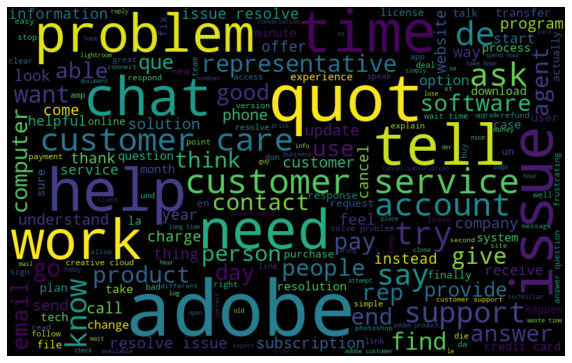

In [21]:
#### Understanding the common words used in customer reviews
all_words = ' '.join([text for text in dsat['verbatim_processed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



*   **Tokenizing the customer verbatim**




In [0]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

In [0]:
def tokenizer(text):
  return text.split()

In [0]:
dsat['verbatim_tokenized'] = dsat['verbatim_processed'].apply(tokenizer)

**Creating bag of words model using count vectorizer function**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [26]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(dsat['verbatim_processed'])
print(tfidf_model)  # returns the row number and column number of cells which have 1 as value

  (0, 12165)	0.09874493743109883
  (0, 17729)	0.09156093410546051
  (0, 5716)	0.09930781377910389
  (0, 18609)	0.07097931313186565
  (0, 563)	0.13508413608502445
  (0, 13977)	0.15098227212659343
  (0, 17153)	0.11567972377376458
  (0, 7769)	0.10863291803348318
  (0, 6425)	0.1548938104836805
  (0, 439)	0.05270102061190689
  (0, 7417)	0.09302936747100186
  (0, 18218)	0.1643019709881623
  (0, 11098)	0.09840083962419978
  (0, 9151)	0.17849300720264924
  (0, 1154)	0.07606843893293766
  (0, 20971)	0.10384067023012522
  (0, 8411)	0.08247678709868354
  (0, 5306)	0.08544033133657669
  (0, 17386)	0.1075378261302145
  (0, 185)	0.12705772607966562
  (0, 8778)	0.09772952251262794
  (0, 10560)	0.11733169509208298
  (0, 3776)	0.08427816186244035
  (0, 2114)	0.12678291205317369
  (0, 10770)	0.12028793253403078
  :	:
  (13489, 23425)	0.640664199510127
  (13489, 23418)	0.640664199510127
  (13489, 21640)	0.42320062255636653
  (13490, 28267)	0.3015113445777636
  (13490, 22420)	0.3015113445777636
  (13490, 

In [27]:
# print the full sparse matrix
print(tfidf_model.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

,aa,aachal,aadobe,aakash,aakriti,aamir,aan,aanchaal,aanchal,aangegeven,aangesloten,aangevraagd,aangezien,aanreiken,aanvraagcode,aanvroeg,aarib,aashish,aayashi,aayushi,ab,abality,abandon,abandonment,abandonnait,abandonner,abandonné,abandonou,abatimento,abbandonati,abbassare,abbastanza,abbia,abbiamo,abbiate,abbinamento,abbindolare,abbonamenti,abbonamento,abbonemant,...,효과적이었습니다,효과적인,후에,후에도,후였는데,후회중입니다,훌륭한,훨씬,휴일과,흐르는,흘렀습니다,흡족히,힘겨운,힘들,힘들게,힘들고,힘들어요,힘들엇습니다,힘들었다,힘들었습니다,힘들었어요,힘들었음,힘들었지만,힘듬니다,힘듭니다,ｃｃを始めるに当たっては,ｈｐでどうしたらいいのか探してうろうろしている時間が長かったので,ｍｓとか,ｐｃの前に座っているわけにはいかず,ｐｃ入れ替えによるアプリの移動方法についてお伺いしましたが,ｐｃ遠隔閲覧での対応で改善されました,ｔｅｌのほうが早いのでそちらがいいです,ｔｅｌは全くつながらないし,ｕｒｌを貼ろうと思ってもコピペが効かなかったです,ｗｅｂで調べて試してもうまくゆかなかったので,ｗｅｂを見ても堂々巡りでした,ｗｉｎ,ｱﾄﾞﾋﾞに限ったことではありませんが,ﾃﾚﾜｰｸでも出来そうなのにｻﾎﾟｰﾄが休み,ﾊﾟｽﾜｰﾄﾞの設定が複雑で何度もやり直した
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [29]:
#### token names
print(vectorizer.get_feature_names())

['aa', 'aachal', 'aadobe', 'aakash', 'aakriti', 'aamir', 'aan', 'aanchaal', 'aanchal', 'aangegeven', 'aangesloten', 'aangevraagd', 'aangezien', 'aanreiken', 'aanvraagcode', 'aanvroeg', 'aarib', 'aashish', 'aayashi', 'aayushi', 'ab', 'abality', 'abandon', 'abandonment', 'abandonnait', 'abandonner', 'abandonné', 'abandonou', 'abatimento', 'abbandonati', 'abbassare', 'abbastanza', 'abbia', 'abbiamo', 'abbiate', 'abbinamento', 'abbindolare', 'abbonamenti', 'abbonamento', 'abbonemant', 'abbrechen', 'abbuchung', 'abbuchungen', 'abbzuziehen', 'abc', 'abd', 'aber', 'abermal', 'aberrant', 'aberration', 'aberto', 'abertura', 'abgebrochen', 'abgebucht', 'abgebuchte', 'abgefertigt', 'abgehandelt', 'abgelaufene', 'abgeloffen', 'abgemeldet', 'abgenommen', 'abgeschaltet', 'abgeschlossen', 'abgeschlossene', 'abgesehen', 'abgestellt', 'abhilash', 'abhinav', 'abhishek', 'abhlehunung', 'abhorrent', 'abierto', 'abilitare', 'abilitati', 'ability', 'abilityto', 'abilty', 'abishek', 'ablauf', 'ablaufen', 'ab